In [ ]:

!pip install gensim scikit-learn matplotlib
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 42.2 MB/s eta 0:00:00


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab') # Added to download the missing resource

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
corpus = [
    "Natural language processing is a fascinating field",
    "Word embeddings capture semantic meanings",
    "NLP is used in chatbots and virtual assistants",
    "I am Shriya frm blore and srihitha is my frnd"
]

In [ ]:
# Tokenize sentences
tokenized_corpus = [word_tokenize(sentence.lower()) for sentence in corpus]
print(tokenized_corpus)

# Train Word2Vec model
model = Word2Vec(sentences=tokenized_corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
model.save("word2vec.model")

model = Word2Vec.load("word2vec.model")

[['natural', 'language', 'processing', 'is', 'a', 'fascinating', 'field'], ['word', 'embeddings', 'capture', 'semantic', 'meanings'], ['nlp', 'is', 'used', 'in', 'chatbots', 'and', 'virtual', 'assistants'], ['i', 'am', 'shriya', 'frm', 'blore', 'and', 'srihitha', 'is', 'my', 'frnd']]


In [ ]:
# Get vectors for a subset of words
words = list(model.wv.index_to_key)[:10]  # Select the first 10 words
print(words)
word_vectors = [model.wv[word] for word in words]
print(word_vectors)


from sklearn.decomposition import PCA

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
pca_result = pca.fit_transform(word_vectors)


['is', 'and', 'frnd', 'my', 'srihitha', 'blore', 'frm', 'shriya', 'am', 'i']
[array([-5.3622725e-04,  2.3643136e-04,  5.1033497e-03,  9.0092728e-03,
       -9.3029495e-03, -7.1168090e-03,  6.4588725e-03,  8.9729885e-03,
       -5.0154282e-03, -3.7633716e-03,  7.3805046e-03, -1.5334714e-03,
       -4.5366134e-03,  6.5540518e-03, -4.8601604e-03, -1.8160177e-03,
        2.8765798e-03,  9.9187379e-04, -8.2852151e-03, -9.4488179e-03,
        7.3117660e-03,  5.0702621e-03,  6.7576934e-03,  7.6286553e-04,
        6.3508903e-03, -3.4053659e-03, -9.4640139e-04,  5.7685734e-03,
       -7.5216377e-03, -3.9361035e-03, -7.5115822e-03, -9.3004224e-04,
        9.5381187e-03, -7.3191668e-03, -2.3337686e-03, -1.9377411e-03,
        8.0774371e-03, -5.9308959e-03,  4.5162440e-05, -4.7537340e-03,
       -9.6035507e-03,  5.0072931e-03, -8.7595852e-03, -4.3918253e-03,
       -3.5099984e-05, -2.9618145e-04, -7.6612402e-03,  9.6147433e-03,
        4.9820580e-03,  9.2331432e-03, -8.1579173e-03,  4.4957981e-03,

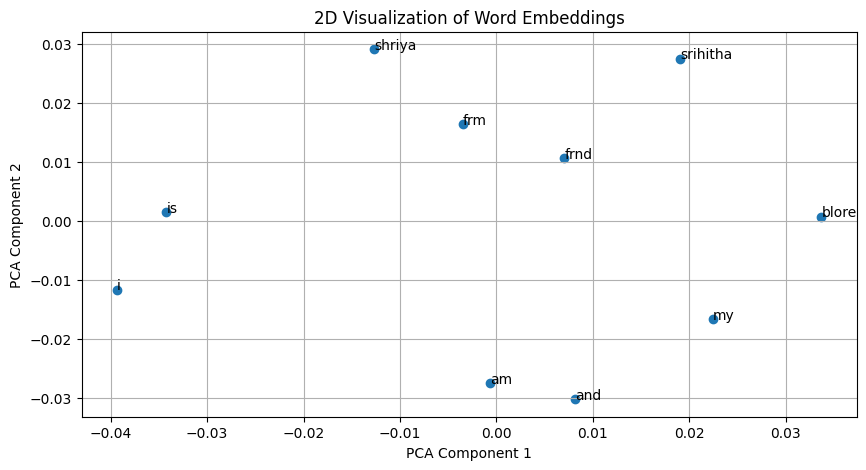

In [ ]:
import matplotlib.pyplot as plt

# Plot the words in 2D space
plt.figure(figsize=(10, 5))
plt.scatter(pca_result[:, 0], pca_result[:, 1])

# Annotate the points with the words
for i, word in enumerate(words):
    plt.annotate(word, xy=(pca_result[i, 0], pca_result[i, 1]))

plt.title("2D Visualization of Word Embeddings")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()